In [1]:
import numpy as np
import scipy as scipy
from scipy import optimize
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator
from matplotlib import gridspec
import matplotlib.ticker as ticker
import time
import peakutils
import seaborn



%matplotlib inline

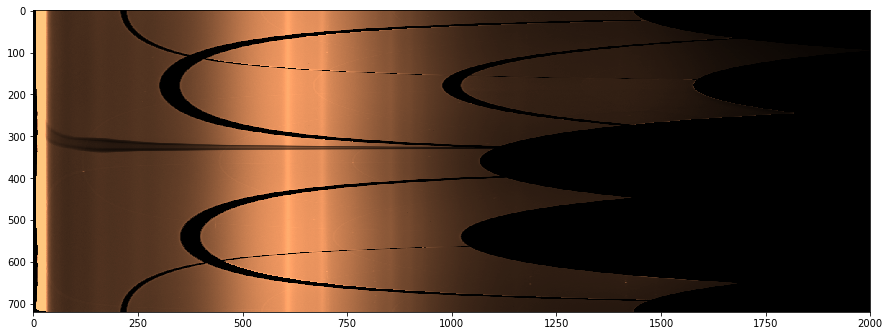

In [196]:
scan = np.load('scan_sum72.npy')
plt.figure(figsize=(15,10))
plt.imshow(scan, cmap = 'copper', clim = (1000, 17000))

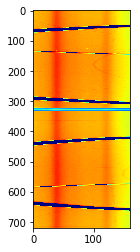

In [197]:
scan_roi = scan[:,570:730] #570-730 = both peaks
plt.imshow(scan_roi, cmap = 'jet', aspect = 0.5, clim = (1000, 17000)) 

In [209]:
#cleaning the scan up

count = 0
for i in range (scan_roi.shape[0]):
    profile = scan_roi[i]
    if (not np.any(profile<0)  and i not in range (330,360)):
        count +=1

clean_scan = np.zeros((count, scan_roi.shape[1]), dtype=np.float32)    
print(clean_scan.shape)
print(scan_roi.shape)


(557, 160)
(720, 160)


In [211]:
clean_count = 0

for i in range (scan_roi.shape[0]):
    profile = scan_roi[i]
    if (not np.any(profile<0)):
        if (i not in range (330,360)):
            clean_scan[clean_count]=profile
            clean_count +=1
        

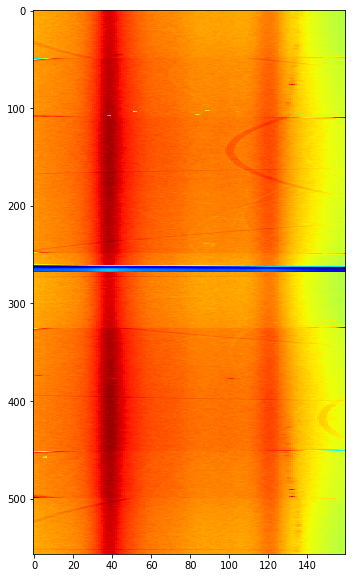

In [212]:
plt. figure(figsize=(15,10))
plt.imshow(clean_scan, cmap = 'jet', aspect = 0.5)

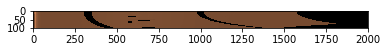

In [105]:
narrow_scan = scan[170:270]
plt.imshow(narrow_scan, cmap = 'copper')

In [112]:
to_shuffle = clean_scan

np.random.shuffle(to_shuffle)

In [15]:
plt.imsave('clean.png', clean_scan)

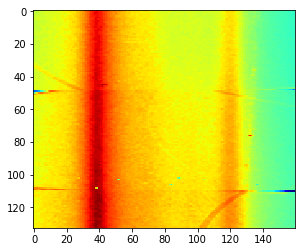

In [133]:
import cv2
from cv2_rolling_ball import subtract_background_rolling_ball

original = cv2.imread(f'clean.png', 0)
#blur = cv2.bilateralFilter(img,10,35,35)

plt.imshow(original, cmap = 'jet')


In [103]:
scan = np.load('scan_sum72.npy')
to_shuffle = scan[:,570:730]

np.random.shuffle(to_shuffle)


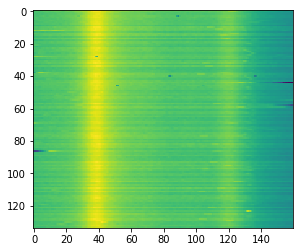

In [119]:
plt.imshow(to_shuffle )
plt.imsave('shuffled', to_shuffle)

In [120]:
shuffled = cv2.imread(f'shuffled.png', 0)

In [130]:
img, background = subtract_background_rolling_ball(original, 20, light_background=False,
                                    use_paraboloid=True, do_presmooth=True)

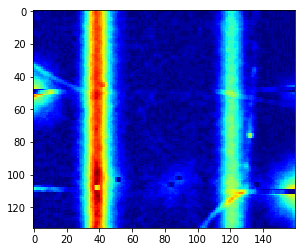

In [131]:
plt.imshow(img, cmap = 'jet')
plt.imsave('rolled.png', img)

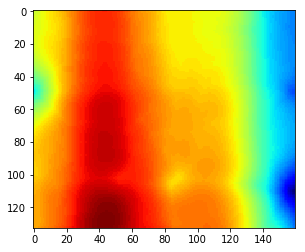

In [132]:
plt.imshow(background, cmap = 'jet')

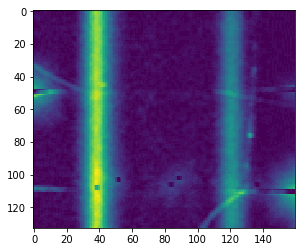

In [134]:

narrow_scan =  matplotlib.pyplot.imread('rolled.png')
plt.imshow(narrow_scan)

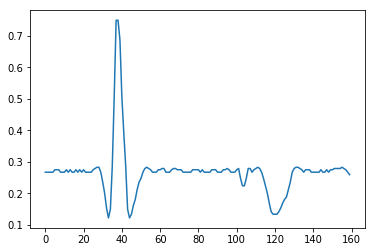

In [135]:
profile_sum = np.zeros(narrow_scan.shape[1], dtype=np.float32) 

for profile in narrow_scan[:,:,0]:
    profile_sum+=profile
    
plt.plot(profile)

TypeError: Invalid dimensions for image data

In [2]:
#Loading pre-processed profiles

q_ROI = (570,650)
chi_ROI = (0,720)

q_set = np.load('q_set.npy')
profile = np.load('1434profile.npy')

In [2]:
map_data = np.load('72trapz_map_data.npy')
#mask_data = np.load('1434mask_data.npy')

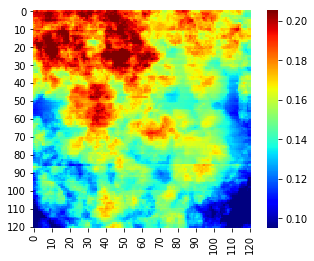

In [3]:
mesh = seaborn.heatmap(map_data, cmap = 'jet', robust = True, square = True, xticklabels = 10 , yticklabels = 10)

# Halo (baseline) correction

# Smoothing profiles

In [28]:

x = q_set[570:650]
y = profile[570:650]

In [29]:
# you cannot smooth data before statistical procedures!!!!

## Savitsky - Golay

# Fitting profiles

## Gaussian

## Voigt

In [30]:
def _1Voigt(x, ampG1, cenG1, sigmaG1, ampL1, cenL1, widL1):
    return (ampG1*(1/(sigmaG1*(np.sqrt(2*np.pi))))*(np.exp(-((x-cenG1)**2)/((2*sigmaG1)**2)))) +\
              ((ampL1*widL1**2/((x-cenL1)**2+widL1**2)) )


In [31]:


base =peakutils.baseline(y)

In [53]:
new_y = y-base

popt, pcov = scipy.optimize.curve_fit(_1Voigt, x, new_y)
perr = np.sqrt(np.diag(pcov))

popt
 #p0=[amp1, cen1, sigma1, amp2, cen2, sigma2]

array([1.        , 1.        , 1.16011208, 1.        , 1.        ,
       1.        ])

In [84]:
def _1gaussian(x, amp1,cen1,sigma1):
    return amp1*(1/(sigma1*(np.sqrt(2*np.pi))))*(np.exp(-((x-cen1)**2)/((2*sigma1)**2)))


popt1, pcov1 = scipy.optimize.curve_fit(_1gaussian, x ,new_y, p0 = [0.00004, 1.335,0.01])
popt1
pcov1

array([[inf, inf, inf],
       [inf, inf, inf],
       [inf, inf, inf]])

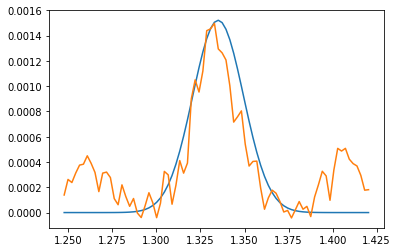

In [83]:
plt.figure()
#plt.plot(x, _1Voigt(x, *popt))
plt.plot(x, _1gaussian(x, *popt1))
#plt.plot(x,y)
#plt.plot(x, base)
plt.plot(x, new_y)
